# *SQLAlchemy Challenge*

## Getting things ready for our analyses


#### **Pandas**, **Numpy**, **Matplotlib** and **SQLAlchemy** are regularly used packages.  If you not have one of these installed, please, open a bash terminal and type: pip.install.<package> where <package> is the package that is not installed.

In [1]:
import datetime as dt
import sqlalchemy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.dates as mdates


from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

print("All necessary libraries installed")



All necessary libraries installed


#### This step takes our SQL Database and creates the engine that will drive the database to our dataframes

In [2]:
engine = create_engine("sqlite:///Instructions/Resources/hawaii.sqlite")

#### Here we are identifying what are the tables(by proxy, Classes) available to us.

In [3]:
Base = automap_base()
Base.prepare(engine, reflect=True)
keys = Base.classes.keys()
print(f"Here are the keys to the kingdom")
print(*keys, sep=", ")

Here are the keys to the kingdom
measurement, station


#### We are creating the classes based off of the tables avialable to us in the SQL database.

In [4]:
Measurement= Base.classes.measurement
Station = Base.classes.station

## Precipitation Analysis

#### let's find the out what are the columns names by calling the dictionary of the class Measurement.

In [5]:
session = Session(engine)
measure_first_row = session.query(Measurement).first()
measure_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x203cefec0b8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

#### Two queries are done here.  The first is identify what the latest date is in the Measurement table.
#### We then want to find out what is the date one year prior to get a range of dates for our second query.
#### These two dates are used in the second query to determine results

### This is: Design a query to retrieve the last 12 months of precipitation data.

In [6]:
lastdate = session.query(func.max(Measurement.date)).\
            scalar()

dt_lastdate= dt.datetime.strptime(lastdate,"%Y-%m-%d").date()
dt_startdate = dt_lastdate - dt.timedelta(days=365)
startdate = dt_startdate.strftime("%Y-%m-%d")

query = session.query(Measurement).\
            filter(Measurement.date.between(startdate,lastdate)).\
            all()

session.close()

### This is: Select only the `date` and `prcp` values.

In [7]:
dates = []
precip = []
for row in query:
    measurement = row
    dates.append(measurement.date)
    precip.append(measurement.prcp)

### This is: Load the query results into a Pandas DataFrame

In [8]:
measurement = pd.DataFrame({"date":dates,
                             "precipitation":precip})
measurement.dropna(inplace = True)
measurement

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


### This is: set the index to the date column `and` Sort the DataFrame values by date

In [9]:
#Sets the column 'date' to be the index.  Sorts the data based off the index.
measurement.set_index('date', inplace = True)
measurement.sort_index(inplace=True)
measurement

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.08


### This is: Plot the results using the DataFrame plot method.

<function matplotlib.pyplot.show(*args, **kw)>

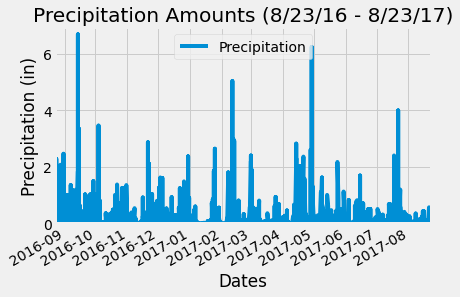

In [10]:
#Overall this will plot what we need for the precipitation analysis.
plt.style.use('fivethirtyeight')

#Setting the variables that populate the chart
date = measurement.index
MDate = mdates.datestr2num(date)
precipitation = measurement['precipitation']


#Setting the date form
months_fmt = mdates.DateFormatter('%M')

#Calling the function subplots
fig, ax = plt.subplots()

#Plotting Precipitation Amounts by date
ax.plot(MDate,precipitation,label = 'Precipitation')

#setting the location of the format of the x-axis ticks.
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
fig.autofmt_xdate()

#Determining the limits of the x an y axes.
datemin = np.datetime64(date[0])# - np.timedelta64(10,'D')
datemax = np.datetime64(date[-1])# + np.timedelta64(10,'D')
precipmin = precipitation.min()
precipmax = precipitation.max() + .25
ax.set_xlim(datemin,datemax)
ax.set_ylim(precipmin,precipmax)

#Making Sure that we have a grid and a legend.
ax.grid(True)
ax.legend(loc=9)

#Adding labels and titles
ax.set_title('Precipitation Amounts (8/23/16 - 8/23/17)')
ax.set_ylabel('Precipitation (in)')
ax.set_xlabel('Dates')

#tightening the layout.
plt.tight_layout

#Saving the image in png format
plt.savefig('results/precipitation.png')

#showing the results
plt.show


In [11]:
precipitation.describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

## Station Analysis

### Looking to see what is available to us in the Station and Measurement tables

In [12]:
session = Session(engine)
Station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [13]:
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

### Determining how many stations are present in the analysis.

In [14]:
#Getting a count of stations.
station_count = session.query(Station).\
                    distinct().\
                    count()

                    
print(f'There are {station_count} stations.')

There are 9 stations.


### Here's list of the stations and the number of observations they have made 

In [15]:

by_station_count=session.query(Measurement,
                               Measurement.station,
                               Station.name, 
                               func.count(Measurement.station).label('station_count')).\
                    join(Station, Measurement.station==Station.station).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).\
                    all()


for row in by_station_count:
    print(f"{row.station_count} observations were made at {row.name}")

2772 observations were made at WAIHEE 837.5, HI US
2724 observations were made at WAIKIKI 717.2, HI US
2709 observations were made at KANEOHE 838.1, HI US
2669 observations were made at WAIMANALO EXPERIMENTAL FARM, HI US
2612 observations were made at MANOA LYON ARBO 785.2, HI US
2202 observations were made at KUALOA RANCH HEADQUARTERS 886.9, HI US
1979 observations were made at HONOLULU OBSERVATORY 702.2, HI US
1372 observations were made at PEARL CITY, HI US
511 observations were made at UPPER WAHIAWA 874.3, HI US


### Now let's get the top station and the number of observations.

In [16]:
top_station_count=session.query(Measurement,
                               Measurement.station,
                               Station.name, 
                               func.count(Measurement.station).label('station_count')).\
                    join(Station, Measurement.station==Station.station).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).\
                    first()
print(f"{top_station_count.name} had the most observations at {top_station_count.station_count}")

WAIHEE 837.5, HI US had the most observations at 2772


### What is the lowest temperature, the highest temperature and the average temperature from the station that had the most observations.

In [17]:
top_station = session.query(Measurement.station).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).\
                first()
t_station = top_station.station

In [18]:
top_station_stats = session.query(Measurement, 
                                  func.max(Measurement.tobs).label('max_temp'),
                                  func.min(Measurement.tobs).label('min_temp'),
                                  func.avg(Measurement.tobs).label('avg_temp'),
                                  Station.name.label('sta_name')).\
                    join(Station, Measurement.station==Station.station).\
                    filter(Measurement.station == t_station).\
                    first()

print(f'{top_station_stats.sta_name} had a maximum temperature of {top_station_stats.max_temp}')
print(f'{top_station_stats.sta_name} had a minimum temperature of {top_station_stats.min_temp}')
print(f'{top_station_stats.sta_name} had a average temperature of {top_station_stats.avg_temp}')


WAIHEE 837.5, HI US had a maximum temperature of 85.0
WAIHEE 837.5, HI US had a minimum temperature of 54.0
WAIHEE 837.5, HI US had a average temperature of 71.66378066378067


### Which station had the most observations in the past 12 months?

In [19]:
last12_top_sta_count=session.query(Measurement,
                                   Measurement.station,
                                   Station.name, 
                                   func.count(Measurement.station).label('station_count')).\
                    join(Station, Measurement.station==Station.station).\
                    filter(Measurement.date.between(startdate,lastdate)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).\
                    first()

print(f"{last12_top_sta_count.name} had the most observations in the last 12 months with {last12_top_sta_count.station_count} observations.")

WAIKIKI 717.2, HI US had the most observations in the last 12 months with 361 observations.


### Now let's take that station and pull the temperature observations for the last year

In [20]:
subquery = session.query(Station.station).filter(Station.name.like('%WAIKIKI%')).subquery()
waikiki_last_year = session.query(Measurement).\
                    filter(Measurement.station.in_(subquery)).\
                    filter(Measurement.date.between(startdate,lastdate))


### We are going to make a list of those temperatures for that station.

In [21]:
tobs = []
for row in waikiki_last_year:
    tobs.append(row.tobs)


### Let's plot those temperature in a histogram

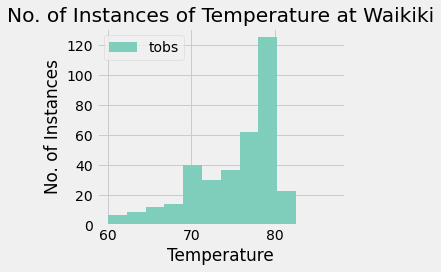

In [26]:
fig,ax = plt.subplots(tight_layout=True, sharey=True)

ax.hist(tobs,bins=12,label='tobs', color='#7fcdbb')


ax.set_xlabel('Temperature')
ax.set_ylabel('No. of Instances')
ax.set_title('No. of Instances of Temperature at Waikiki')

ax.legend()


#Saving the image in png format
plt.savefig('results/wakiki-histogram.png', dbi=300, bbox_inches='tight')

plt.show()


### Because the instructions were not necessarily clear, I went ahead and did the last 12 months for the station with the most overall observations

In [23]:
subquery = session.query(Station.station).filter(Station.name.like('%WAIHEE%')).subquery()
waihee_last_year = session.query(Measurement).\
                   filter(Measurement.station.in_(subquery)).\
                   filter(Measurement.date.between(startdate,lastdate))
session.close()

In [24]:
waihee_tobs = []
for row in waihee_last_year:
    waihee_tobs.append(row.tobs)

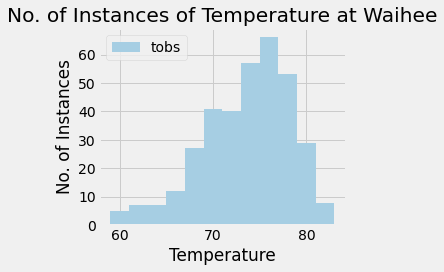

In [27]:
fig,ax = plt.subplots(tight_layout=True, sharey=True)

ax.hist(waihee_tobs,bins=12,label='tobs', color='#a6cee3')


ax.set_xlabel('Temperature')
ax.set_ylabel('No. of Instances')
ax.set_title('No. of Instances of Temperature at Waihee')

ax.legend()

#Saving the image in png format
plt.savefig('results/waihee-histogram.png', dbi=300, bbox_inches='tight')

plt.show()
